In [41]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import os
import datetime
import pickle
import pyresample
from global_land_mask import globe
import tqdm

# Averaging  data and plot histogram "Central limit theorem"
The data was downloaded from FROST using get_weather_station.py and get_metadata.py

In [43]:
files = os.listdir('./stations')
files.remove('meta_data.pkl') #not a station

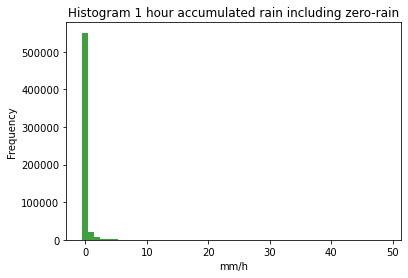

Max precipitation:  48.9
Number of observations 586922


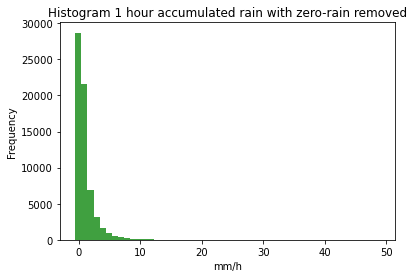

max precipitation:  48.9
number of observations 64556


/tmp/ipykernel_36046/820883127.py:36: RuntimeWarning: invalid value encountered in log
  x = np.log(x)


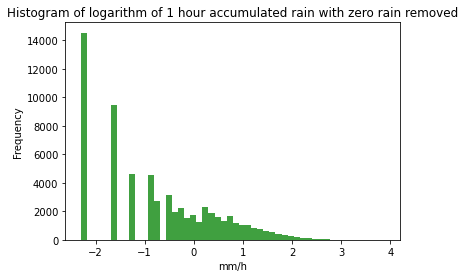

Max precipitation:  3.8897773964808264
Number of observations 64556


In [44]:
stations = []
for id_ in files:
    stations.append(xr.open_dataset("./stations/"+id_))
metadata = pd.read_pickle(r"./stations/meta_data.pkl")

for s_i in range(len(stations)):
    stations[s_i]['id'] = stations[s_i]['id'].astype(str)
    stations[s_i]['name'] = stations[s_i]['name'].astype(str)
    stations[s_i]['shortname'] = stations[s_i]['shortname'].astype(str)
    stations[s_i]['latitude'] = float(stations[s_i]['latitude'])
    stations[s_i]['longitude'] = float(stations[s_i]['longitude'])
    stations[s_i]['resolution'] = stations[s_i]['resolution'].astype(str)

x = []
for stat in stations:
    x.append(stat['PT1H'].to_numpy().ravel())

x = np.hstack(x).astype(float)
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram 1 hour accumulated rain including zero-rain')
plt.show()
print("Max precipitation: ", max(x))
print("Number of observations", len(x))

x = x[x != 0.0]
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram 1 hour accumulated rain with zero-rain removed')
plt.show()
print("max precipitation: ", max(x))
print("number of observations", len(x))

x = np.log(x)
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram of logarithm of 1 hour accumulated rain with zero rain removed')
#plt.xlim(0, 5)
#plt.ylim(0, 3)
plt.show()
print("Max precipitation: ", max(x))
print("Number of observations", len(x))

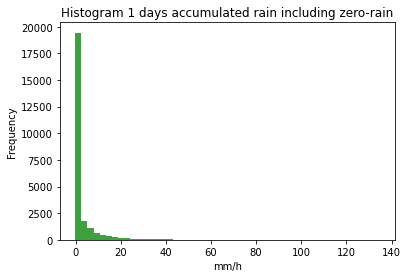

Max precipitation:  134.70000000000002
Number of observations 25511


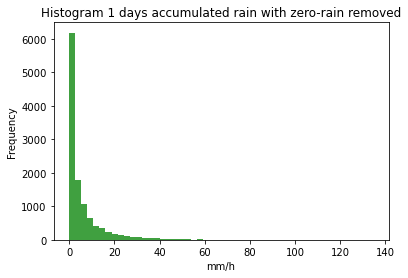

max precipitation:  134.70000000000002
number of observations 12257


/tmp/ipykernel_36046/1081971075.py:38: RuntimeWarning: invalid value encountered in log
  x = np.log(x)


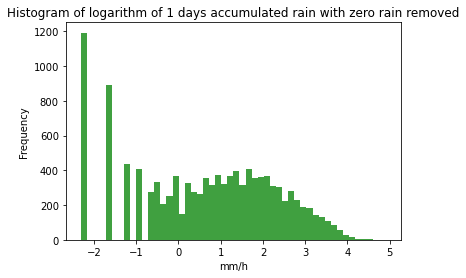

Max precipitation:  4.903050083416319
Number of observations 12257


In [35]:
stations = []
for id_ in files:
    stations.append(xr.open_dataset("./stations/"+id_))
metadata = pd.read_pickle(r"./stations/meta_data.pkl")

for s_i in range(len(stations)):
    stations[s_i]['id'] = stations[s_i]['id'].astype(str)
    stations[s_i]['name'] = stations[s_i]['name'].astype(str)
    stations[s_i]['shortname'] = stations[s_i]['shortname'].astype(str)
    stations[s_i]['latitude'] = float(stations[s_i]['latitude'])
    stations[s_i]['longitude'] = float(stations[s_i]['longitude'])
    stations[s_i]['resolution'] = stations[s_i]['resolution'].astype(str)
    stations[s_i] = stations[s_i].resample(time='1D').sum()


x = []
for stat in stations:
    x.append(stat['PT1H'].to_numpy().ravel())

x = np.hstack(x).astype(float)
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram 1 days accumulated rain including zero-rain')
plt.show()
print("Max precipitation: ", max(x))
print("Number of observations", len(x))

x = x[x != 0.0]
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram 1 days accumulated rain with zero-rain removed')
plt.show()
print("max precipitation: ", max(x))
print("number of observations", len(x))

x = np.log(x)
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram of logarithm of 1 days accumulated rain with zero rain removed')
#plt.xlim(0, 5)
#plt.ylim(0, 3)
plt.show()
print("Max precipitation: ", max(x))
print("Number of observations", len(x))    


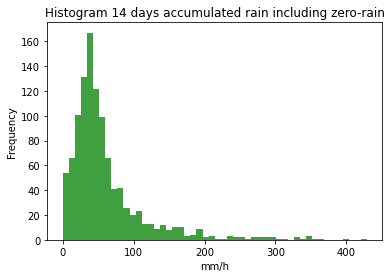

max precipitation:  428.79999999999995
number of observations 1087


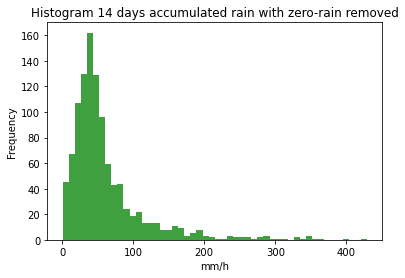

max precipitation:  428.79999999999995
number of observations 1076


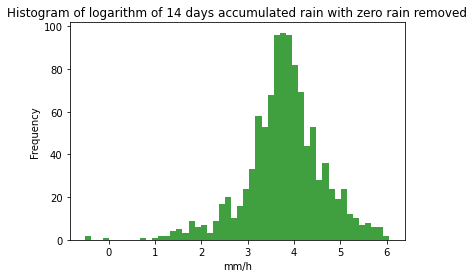

max precipitation:  6.060990609756592


In [39]:
stations = []
for id_ in files:
    stations.append(xr.open_dataset("./stations/"+id_))
metadata = pd.read_pickle(r"./stations/meta_data.pkl")

for s_i in range(len(stations)):
    stations[s_i]['id'] = stations[s_i]['id'].astype(str)
    stations[s_i]['name'] = stations[s_i]['name'].astype(str)
    stations[s_i]['shortname'] = stations[s_i]['shortname'].astype(str)
    stations[s_i]['latitude'] = float(stations[s_i]['latitude'])
    stations[s_i]['longitude'] = float(stations[s_i]['longitude'])
    stations[s_i]['resolution'] = stations[s_i]['resolution'].astype(str)
    stations[s_i] = stations[s_i].resample(time='28D').sum()
    
x = []
for stat in stations:
    for obs in stat['PT1H']:
        x.append(float(obs))

n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram 14 days accumulated rain including zero-rain')
plt.show()
print("max precipitation: ", max(x))
print("number of observations", len(x))

x = []
for stat in stations:
    for obs in stat['PT1H']:
        if float(obs) != 0.0:
            x.append(float(obs))
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram 14 days accumulated rain with zero-rain removed')
plt.show()
print("max precipitation: ", max(x))
print("number of observations", len(x))

x = []
for stat in stations:
    for obs in stat['PT1H']:
        if float(obs) != 0.0:
            x.append(float(obs))

x = np.array(x)
x = np.log(x)
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('mm/h')
plt.ylabel('Frequency')
plt.title('Histogram of logarithm of 14 days accumulated rain with zero rain removed')
#plt.xlim(0, 5)
#plt.ylim(0, 3)
plt.show()
print("max precipitation: ", max(x))

In [45]:
stations[0]

<xarray.Dataset>
Dimensions:     (time: 2263)
Coordinates:
  * time        (time) datetime64[ns] 2018-06-07T08:00:00 ... 2018-09-09T14:0...
    latitude    float64 59.66
    longitude   float64 5.954
    resolution  <U30 'sum(precipitation_amount PT1H)'
    shortname   <U5 'Etne '
    id          <U7 'SN47498'
    name        <U7 'ETNE II'
Data variables:
    PT1H        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.2 0.0 0.0 0.0